___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annual income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [96]:
df = pd.read_csv('Mall_Customers.csv')

#### Explore Data

You can rename columns to more usable, if you need.

In [97]:
# Our aim here is to segment our customers into clusters depending on their tendencies to shopping.

In [98]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
df.shape

(200, 5)

In [100]:
df.rename(columns={'CustomerID':'id', 'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income', 
           'Spending Score (1-100)':'score'}, inplace=True)

In [101]:
df.head()

,id,gender,age,annual_income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
df.isnull().sum()

id               0
gender           0
age              0
annual_income    0
score            0
dtype: int64

In [103]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [104]:
df.gender = df.gender.map({'Male':0, 'Female':1})

In [105]:
df.head()

,id,gender,age,annual_income,score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             200 non-null    int64
 1   gender         200 non-null    int64
 2   age            200 non-null    int64
 3   annual_income  200 non-null    int64
 4   score          200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [107]:
df.describe()

,id,gender,age,annual_income,score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


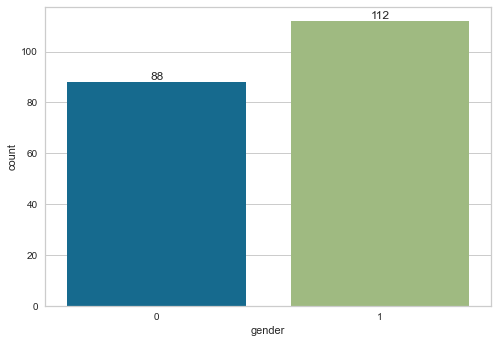

In [108]:
ax = sns.countplot(df.gender)
ax.bar_label(ax.containers[0]);

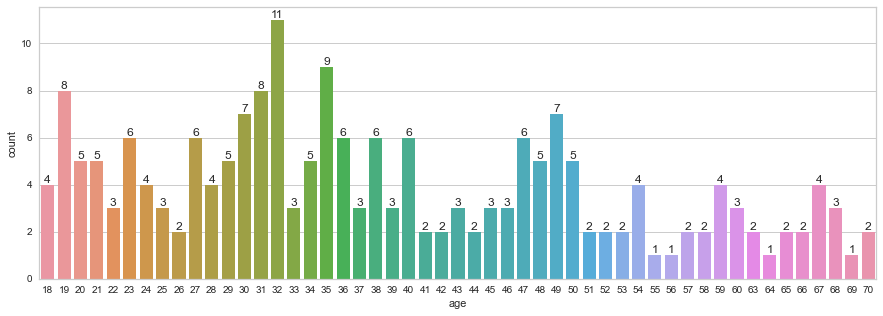

In [109]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df.age)
ax.bar_label(ax.containers[0]);

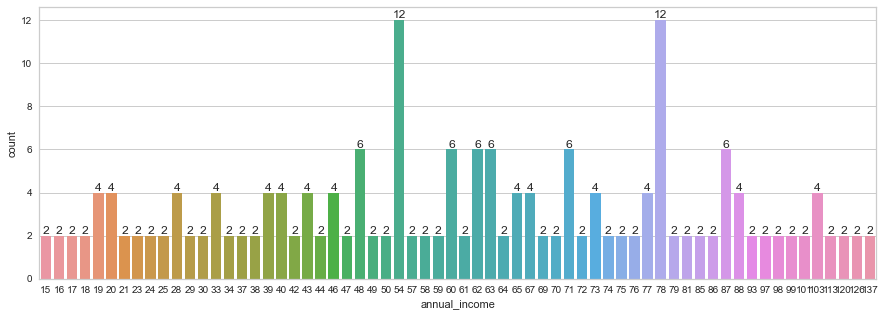

In [110]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df.annual_income)
ax.bar_label(ax.containers[0]);

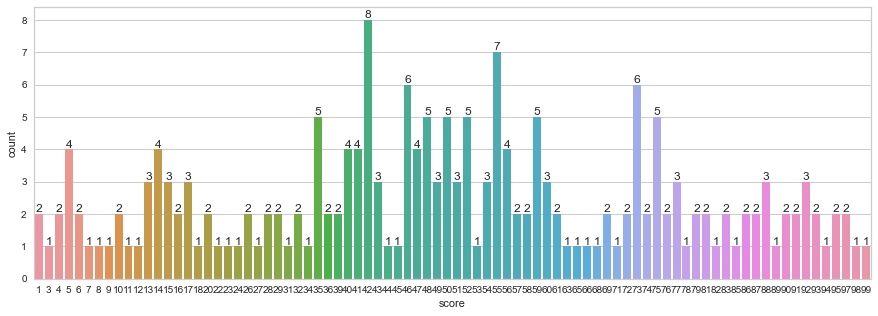

In [111]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df.score)
ax.bar_label(ax.containers[0]);

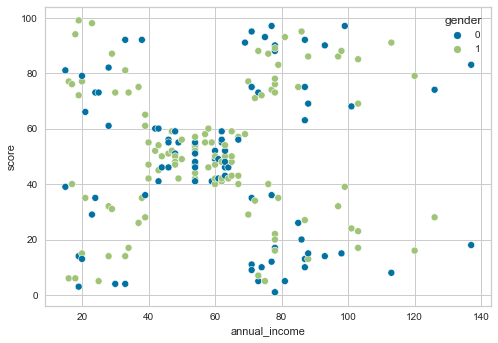

In [112]:
sns.scatterplot(x=df.annual_income, y=df.score, hue=df.gender);

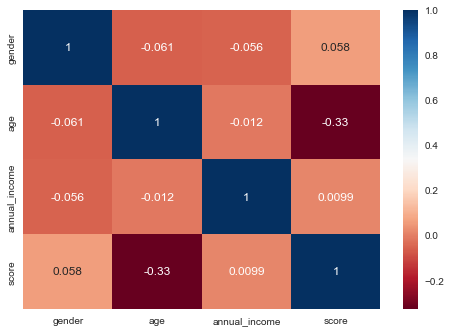

In [113]:
sns.heatmap(df.drop('id', axis=1).corr(), annot=True, cmap='RdBu');

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [114]:
df1 = df[['age', 'score']]

In [115]:
df1.head()

,age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scale = StandardScaler()

In [118]:
df1_scaled = scale.fit_transform(df1)

In [119]:
df1_scaled = pd.DataFrame(df1_scaled, columns=df1.columns)

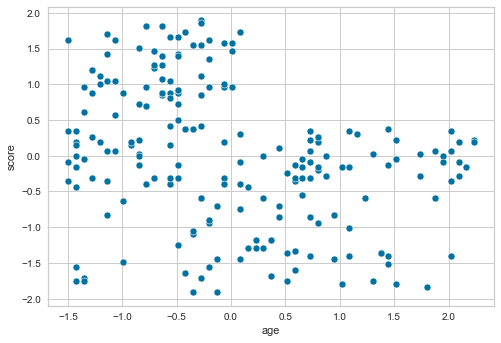

In [120]:
sns.scatterplot(x='age', y='score', data=df1_scaled);

#### *ii. Determine optimal number of clusters*

In [121]:
from pyclustertend import hopkins

In [122]:
hopkins(df1_scaled, df1_scaled.shape[0])

0.28779724763360925

In [123]:
from sklearn.cluster import KMeans

In [124]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df1_scaled)
    ssd.append(model.inertia_)

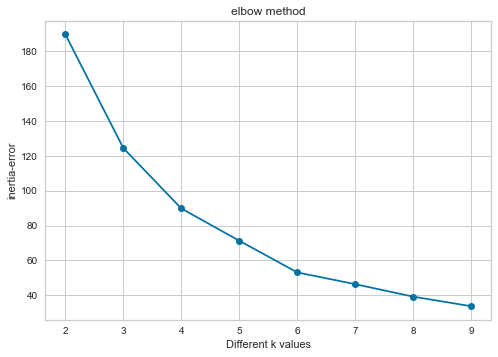

In [125]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method"); 

In [126]:
ssd

[189.3874903399244,
 124.32628617921526,
 89.76521676586151,
 71.2955659221944,
 53.173737453809174,
 46.4462850094916,
 39.30587325192688,
 33.83644725407146]

In [127]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,65.061204
3,34.561069
4,18.469651
5,18.121828
6,6.727452
7,7.140412
8,5.469426


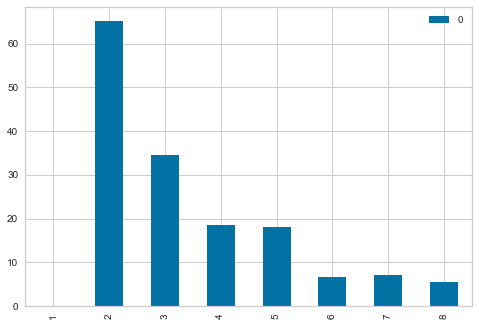

In [128]:
df_diff.plot(kind='bar');

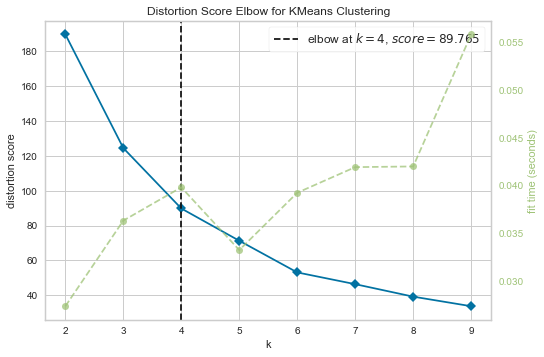

In [129]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(df1_scaled)        
visualizer.show();

In [130]:
from sklearn.metrics import silhouette_score

In [131]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df1_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df1_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007974
For n_clusters=8, the silhouette score is 0.41387412992354433
For n_clusters=9, the silhouette score is 0.4230225675027671


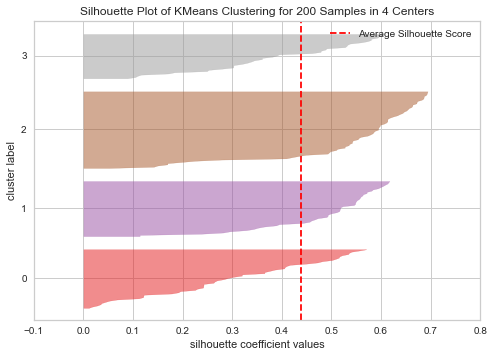

In [132]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_ = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model_)

visualizer.fit(df1_scaled)    
visualizer.poof();

#### I will continue with k=4

### Why silhouette_score is negative?

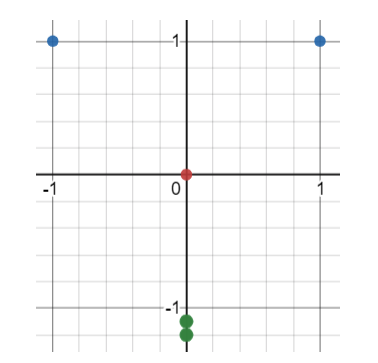

#### *iii. Apply K Means*

In [133]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(df1_scaled)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

In [134]:
clusters = model.labels_

In [135]:
df1_scaled["predicted_clusters_kmeans_age_vs_score"] = clusters

In [136]:
df["predicted_clusters_kmeans_age_vs_score"] = clusters

#### *iv. Visualizing and Labeling All the Clusters*

Text(0.5, 1.0, 'Predicted Clusters')

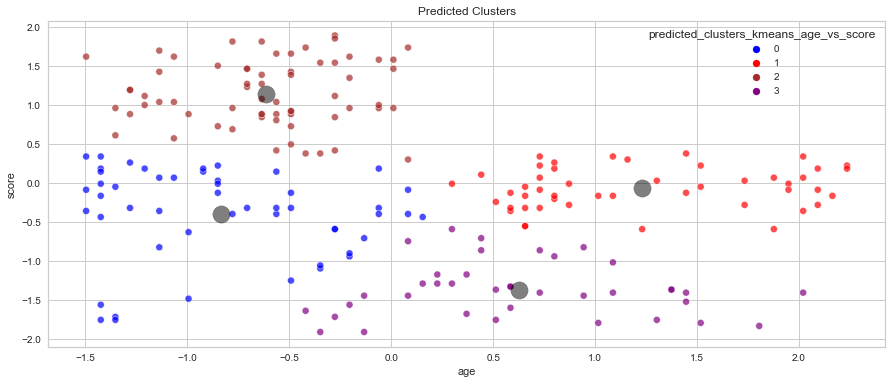

In [138]:
plt.figure(figsize = (15,6))

sns.scatterplot(df1_scaled["age"], df1_scaled["score"], hue = df1_scaled['predicted_clusters_kmeans_age_vs_score'], 
            palette = ['blue', 'red', 'brown', 'purple'], alpha=0.7)
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);
plt.title("Predicted Clusters")

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [139]:
df2 = df[['annual_income', 'score']]

In [140]:
df2.head()

,annual_income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [141]:
df2_scaled = scale.fit_transform(df2)

In [142]:
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

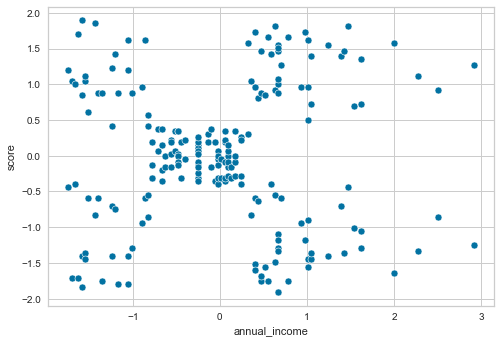

In [143]:
sns.scatterplot(x='annual_income', y='score', data=df2_scaled);

#### *ii. Determine optimal number of clusters*

In [144]:
hopkins(df2_scaled, df2_scaled.shape[0])

0.31486564336352774

In [145]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df2_scaled)
    ssd.append(model.inertia_)

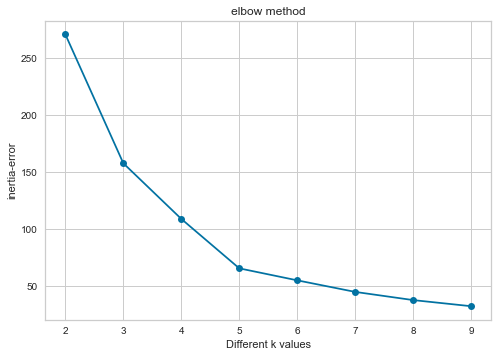

In [146]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method"); 

In [147]:
ssd

[270.70426664306717,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.057348270385965,
 44.91118554999014,
 37.73640346254161,
 32.37525368158289]

In [148]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,113.000258
3,48.782692
4,43.352908
5,10.511060
6,10.146163
7,7.174782
8,5.361150


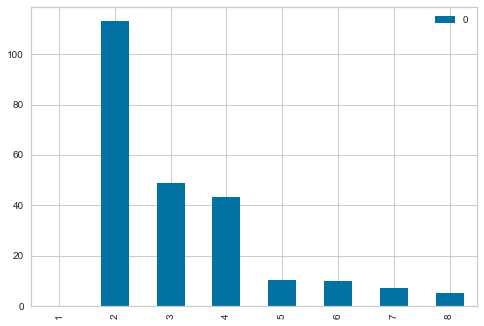

In [149]:
df_diff.plot(kind='bar');

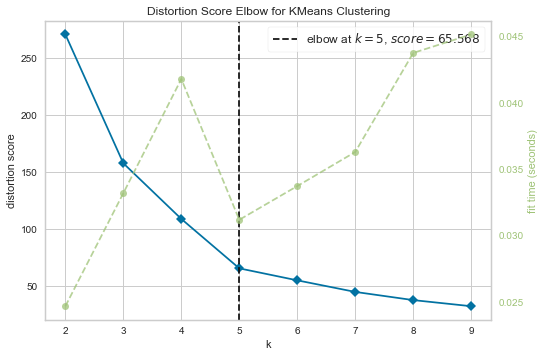

In [150]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(df2_scaled)        
visualizer.show();

In [151]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df2_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706
For n_clusters=9, the silhouette score is 0.45532159949822093


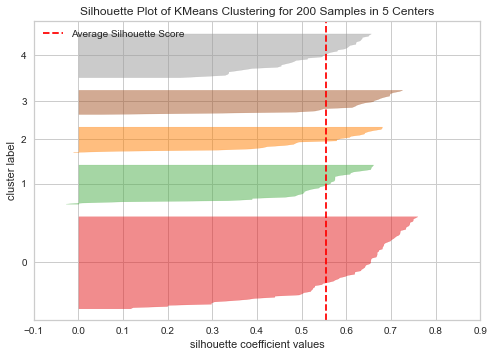

In [152]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_ = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model_)

visualizer.fit(df2_scaled)    
visualizer.poof();

#### I will continue with k=5

#### *iii. Apply K Means*

In [153]:
model2 = KMeans(n_clusters=5, random_state=42)
model2.fit_predict(df2_scaled)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [154]:
clusters2 = model2.labels_

In [155]:
df2_scaled["predicted_clusters_kmeans_annual_vs_score"] = clusters2

In [156]:
df["predicted_clusters_kmeans_annual_vs_score"] = clusters2

#### *iv. Visualizing and Labeling All the Clusters*

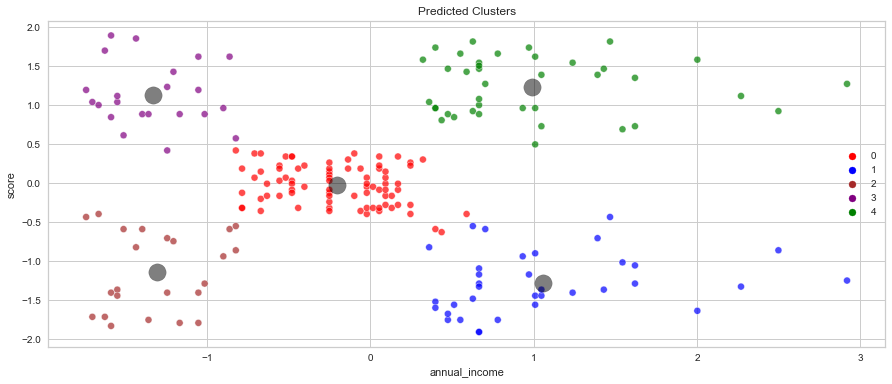

In [160]:
plt.figure(figsize = (15,6))

sns.scatterplot(df2_scaled["annual_income"], df2_scaled["score"], 
            hue = df2_scaled['predicted_clusters_kmeans_annual_vs_score'], 
            palette = ['red', 'blue', 'brown', 'purple', 'green'], alpha=0.7)
centers = model2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);
plt.title("Predicted Clusters")
plt.legend();

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [161]:
from sklearn.cluster import AgglomerativeClustering

In [162]:
from scipy.cluster.hierarchy import linkage

In [163]:
hc_ward = linkage(y = df1_scaled, method = "ward")
hc_complete = linkage(df1_scaled, "complete")
hc_average = linkage(df1_scaled, "average")
hc_single = linkage(df1_scaled, "single")

In [164]:
from scipy.cluster.hierarchy import dendrogram

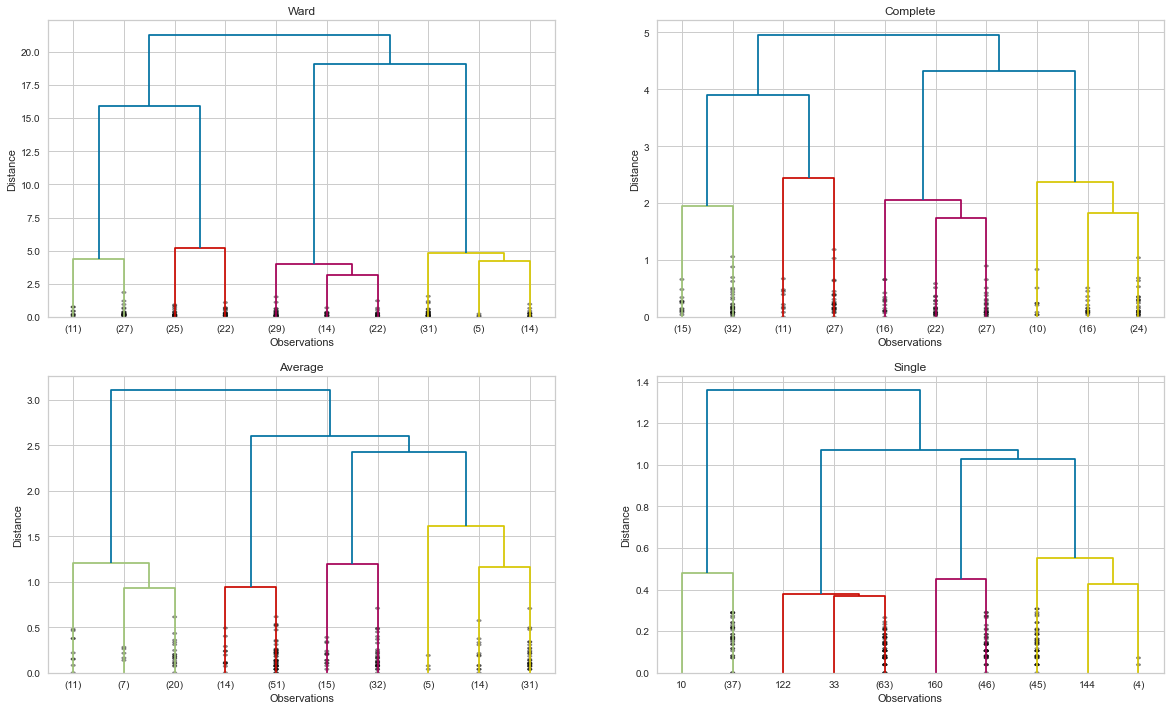

In [165]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [166]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df1_scaled)
    cluster_labels = Agg_model.labels_
    silhouette_avg = silhouette_score(df1_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3785274169134887
For n_clusters=3, the silhouette score is 0.5317742391151472
For n_clusters=4, the silhouette score is 0.6449180023090975
For n_clusters=5, the silhouette score is 0.5878991828047566
For n_clusters=6, the silhouette score is 0.570438537402049
For n_clusters=7, the silhouette score is 0.5351696454993601
For n_clusters=8, the silhouette score is 0.5533695612745855
For n_clusters=9, the silhouette score is 0.45088217904955746


#### It is obvious that both the dendrogram and the silhouette score recommend 4 for k.

## Clustering based on Annual Income and Spending Score- x2

In [167]:
hc_ward = linkage(y = df2_scaled, method = "ward")
hc_complete = linkage(df2_scaled, "complete")
hc_average = linkage(df2_scaled, "average")
hc_single = linkage(df2_scaled, "single")

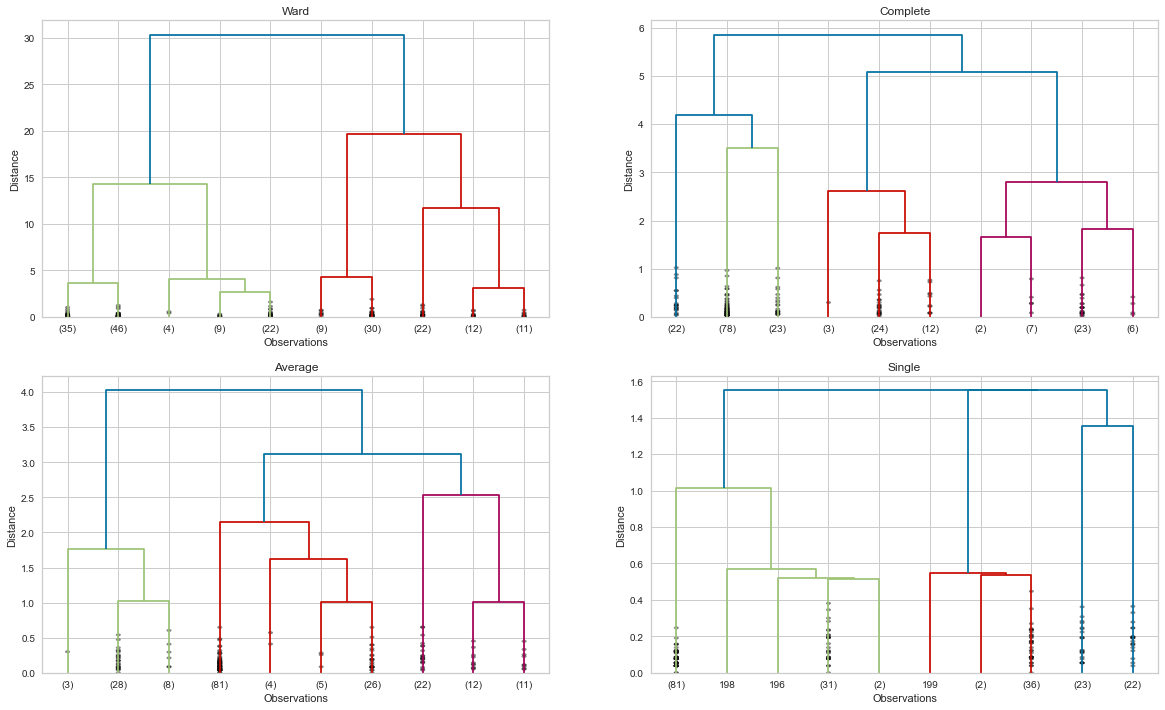

In [168]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [169]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df2_scaled)
    cluster_labels = Agg_model.labels_
    silhouette_avg = silhouette_score(df2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5234259096704396
For n_clusters=3, the silhouette score is 0.57673750163457
For n_clusters=4, the silhouette score is 0.6280789340729308
For n_clusters=5, the silhouette score is 0.6915071284226041
For n_clusters=6, the silhouette score is 0.6490520858160557
For n_clusters=7, the silhouette score is 0.6312918587964707
For n_clusters=8, the silhouette score is 0.496283122214545
For n_clusters=9, the silhouette score is 0.4782386083448125


#### I will continue with 5 for k.

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [170]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(df1_scaled)

In [171]:
df1_scaled['predicted_clusters_hierarchical_age_vs_score'] = y_agg

In [172]:
df['predicted_clusters_hierarchical_age_vs_score'] = y_agg

In [173]:
df1_scaled.head()

,age,score,predicted_clusters_kmeans_age_vs_score,predicted_clusters_hierarchical_age_vs_score
0,-1.424569,-0.434801,0,1
1,-1.281035,1.195704,2,2
2,-1.352802,-1.715913,0,1
3,-1.137502,1.040418,2,2
4,-0.563369,-0.395980,0,1


#### Annual Income and Spending Score- x2

In [174]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2= Agg2.fit_predict(df2_scaled)

In [175]:
df2_scaled['predicted_clusters_hierarchical_annual_vs_score'] = y_agg2

In [176]:
df['predicted_clusters_hierarchical_annual_vs_score'] = y_agg2

In [177]:
df2_scaled.head()

,annual_income,score,predicted_clusters_kmeans_annual_vs_score,predicted_clusters_hierarchical_annual_vs_score
0,-1.738999,-0.434801,2,2
1,-1.738999,1.195704,3,4
2,-1.700830,-1.715913,2,2
3,-1.700830,1.040418,3,4
4,-1.662660,-0.395980,2,2


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

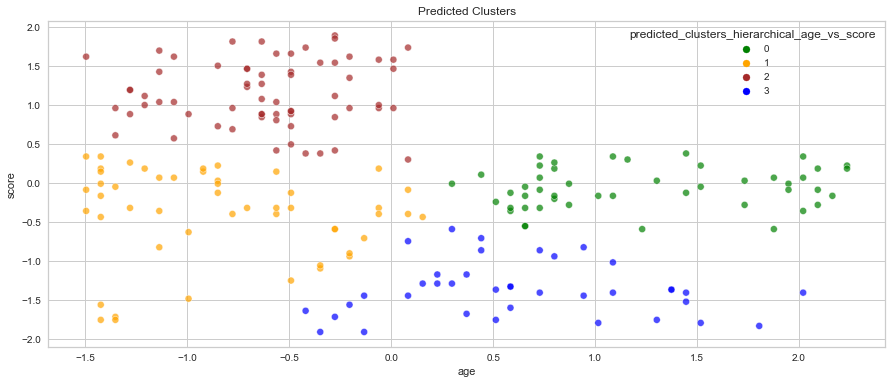

In [178]:
plt.figure(figsize = (15,6))

sns.scatterplot(df1_scaled["age"], df1_scaled["score"], 
            hue = df1_scaled['predicted_clusters_hierarchical_age_vs_score'], 
                palette = ['green','orange','brown','blue'], alpha=0.7)
plt.title("Predicted Clusters");

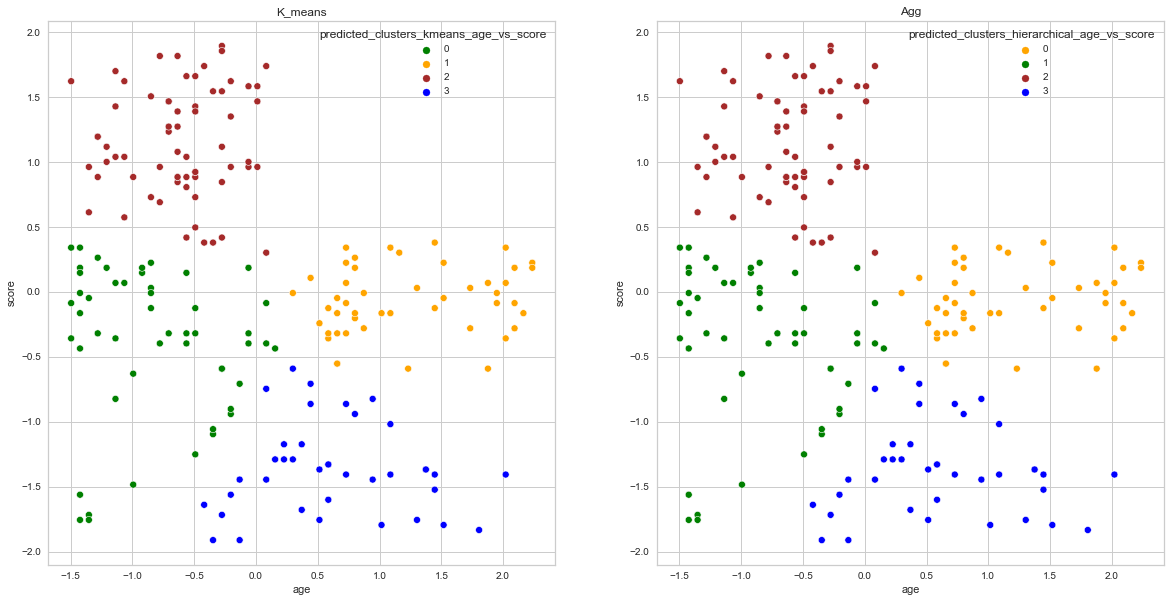

In [179]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='age', y='score', hue = df1_scaled['predicted_clusters_kmeans_age_vs_score'], 
                data=df1_scaled, palette=['green','orange','brown','blue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='age', y='score', hue = df1_scaled['predicted_clusters_hierarchical_age_vs_score'],
                data=df1_scaled, palette=['orange', 'green','brown','blue'])
plt.title("Agg")
plt.show()

In [180]:
df1_scaled['predicted_clusters_hierarchical_age_vs_score'].value_counts()

2    65
1    50
0    47
3    38
Name: predicted_clusters_hierarchical_age_vs_score, dtype: int64

In [181]:
df1_scaled['predicted_clusters_kmeans_age_vs_score'].value_counts()

2    65
0    50
1    47
3    38
Name: predicted_clusters_kmeans_age_vs_score, dtype: int64

#### Annual Income and Spending Score- x2

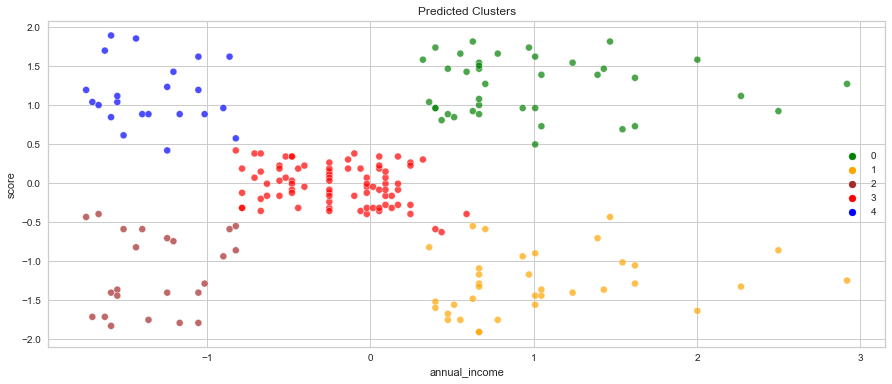

In [182]:
plt.figure(figsize = (15,6))

sns.scatterplot(df2_scaled["annual_income"], df2_scaled["score"], 
            hue = df2_scaled['predicted_clusters_hierarchical_annual_vs_score'], 
            palette = ['green','orange','brown','red', 'blue'], alpha=0.7)
plt.title("Predicted Clusters")
plt.legend();

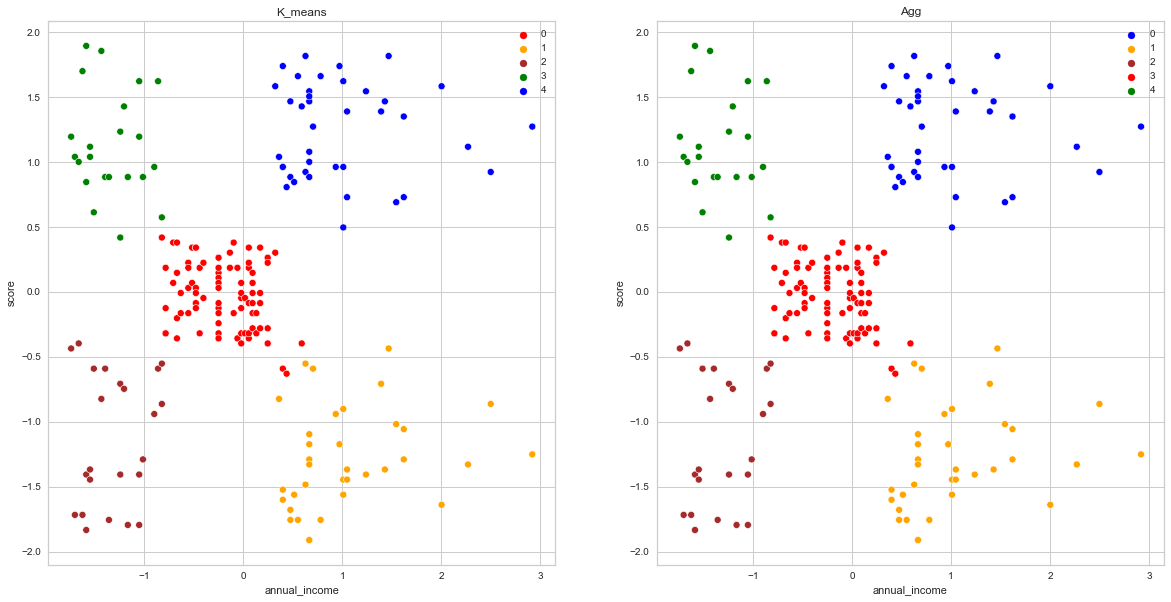

In [183]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='annual_income', y='score', hue = df2_scaled['predicted_clusters_kmeans_annual_vs_score'], 
                data=df2_scaled, palette=['red','orange','brown', 'green', 'blue'])
plt.title("K_means")
plt.legend()
plt.subplot(122)
sns.scatterplot(x='annual_income', y='score', hue = df2_scaled['predicted_clusters_hierarchical_annual_vs_score'],
                data=df2_scaled, palette=['blue', 'orange','brown', 'red', 'green'])
plt.title("Agg")
plt.legend();

In [184]:
df2_scaled['predicted_clusters_hierarchical_annual_vs_score'].value_counts()

3    81
0    39
1    35
2    23
4    22
Name: predicted_clusters_hierarchical_annual_vs_score, dtype: int64

In [185]:
df2_scaled['predicted_clusters_kmeans_annual_vs_score'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters_kmeans_annual_vs_score, dtype: int64

### I decided to continue with the results of K-Means

#### Interpretation based on Age and Spending Score- x1

In [186]:
df.head()

,id,gender,age,annual_income,score,predicted_clusters_kmeans_age_vs_score,predicted_clusters_kmeans_annual_vs_score,predicted_clusters_hierarchical_age_vs_score,predicted_clusters_hierarchical_annual_vs_score
0,1,0,19,15,39,0,2,1,2
1,2,0,21,15,81,2,3,2,4
2,3,1,20,16,6,0,2,1,2
3,4,1,23,16,77,2,3,2,4
4,5,1,31,17,40,0,2,1,2


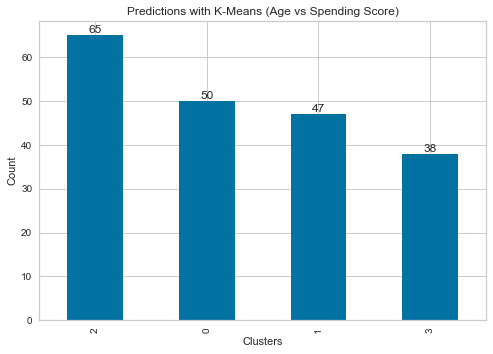

In [203]:
ax = df['predicted_clusters_kmeans_age_vs_score'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Predictions with K-Means (Age vs Spending Score)")
plt.xlabel("Clusters")
plt.ylabel("Count");

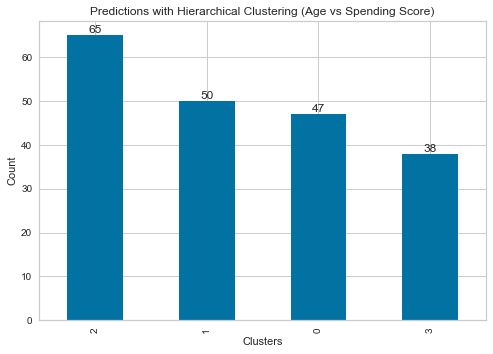

In [205]:
ax = df['predicted_clusters_hierarchical_age_vs_score'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Predictions with Hierarchical Clustering (Age vs Spending Score)")
plt.xlabel("Clusters")
plt.ylabel("Count");

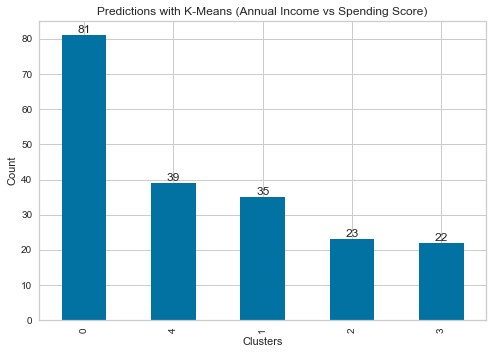

In [206]:
ax = df['predicted_clusters_kmeans_annual_vs_score'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Predictions with K-Means (Annual Income vs Spending Score)")
plt.xlabel("Clusters")
plt.ylabel("Count");

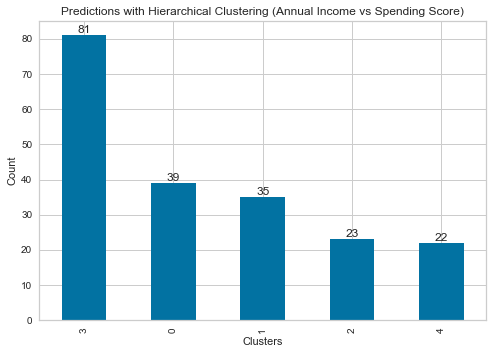

In [207]:
ax = df['predicted_clusters_hierarchical_annual_vs_score'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Predictions with Hierarchical Clustering (Annual Income vs Spending Score)")
plt.xlabel("Clusters")
plt.ylabel("Count");

In [191]:
df.iloc[:, [2,3,4,5]].groupby('predicted_clusters_kmeans_age_vs_score').mean()

,age,annual_income,score
predicted_clusters_kmeans_age_vs_score,,,
0,27.220000,59.620000,40.040000
1,55.978723,54.425532,48.510638
2,30.292308,63.830769,79.815385
3,47.605263,63.789474,15.000000


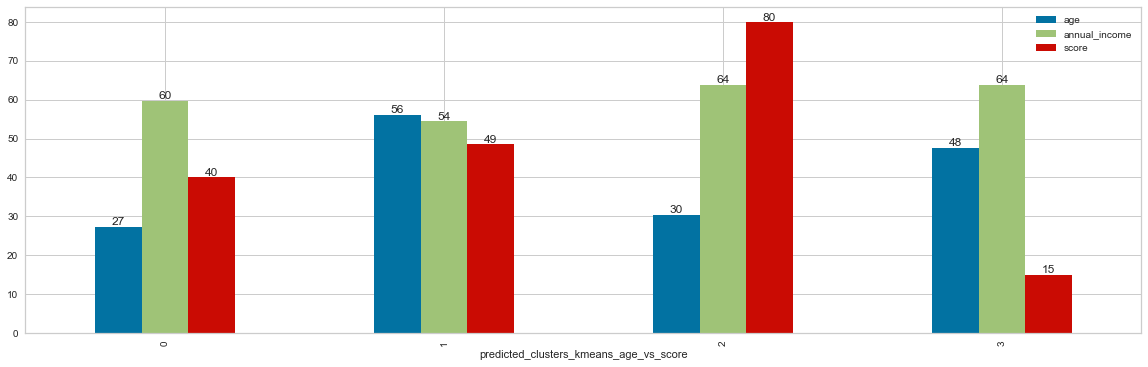

In [192]:
ax = df.iloc[:, [2,3,4,5]].groupby("predicted_clusters_kmeans_age_vs_score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

### Conclusion

**cluster 0**: The average age is around 27. Even though annual_income is high spending_scores are a little bit low. 
It should be researched what can be done to direct these customers to do shopping more.

**cluster 1** : The average age is around 56. Both annual_income and spending_scores are on average. 
It should be researched what can be done to direct these customers to do shopping more.

**cluster 2** :The average age is around 30. The annual_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions should be send them in order not to lose their interest in shopping. 

**cluster 3**: The average age is around 48. Annual_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to do shopping more.

#### Interpretation based on Annual Income and Spending Score- x2

In [214]:
df.gender = df.gender.map({0:'Male', 1:'Female'})

In [210]:
df.iloc[:, [1,2,3,4,6]].groupby('predicted_clusters_kmeans_annual_vs_score').mean()

,gender,age,annual_income,score
predicted_clusters_kmeans_annual_vs_score,,,,
0,0.592593,42.716049,55.296296,49.518519
1,0.457143,41.114286,88.200000,17.114286
2,0.608696,45.217391,26.304348,20.913043
3,0.590909,25.272727,25.727273,79.363636
4,0.538462,32.692308,86.538462,82.128205


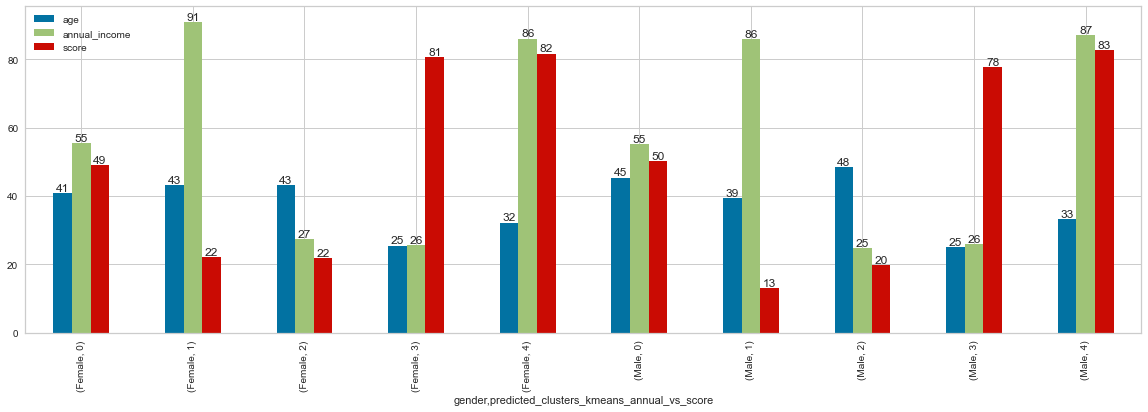

In [217]:
ax = df.iloc[:, [1,2,3,4,6]].groupby(['gender', 'predicted_clusters_kmeans_annual_vs_score']).mean().plot(kind='bar', 
                                                                                        figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

## Conclusion

### Female

**cluster 0** : The average age is around 41. Both annual_income and spending_score are on average. 
It should be researched what can be done to direct this group to do more shopping.

**cluster 1**: The average age is around 43. The annual_income is very high but the spending_score is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annual_income and spending_score are low. Encouragements like gift certificated might be directed to this group.

**cluster 3**: The average age is around 25. Low annual_income but very high spending score. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to lose this group of customers.

### Male

**cluster 0** : The average age is around 45. Both annual_income and spending_score are on average. 
It should be researched what can be done to direct this group to do more shopping.

**cluster 1**: The average age is around 39, the annual_income is very high but the spending_score is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annual_income and spending_score are low. This group can be directed to do more shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_income but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33. The annual income and the spending_score are very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to lose this group of customers.

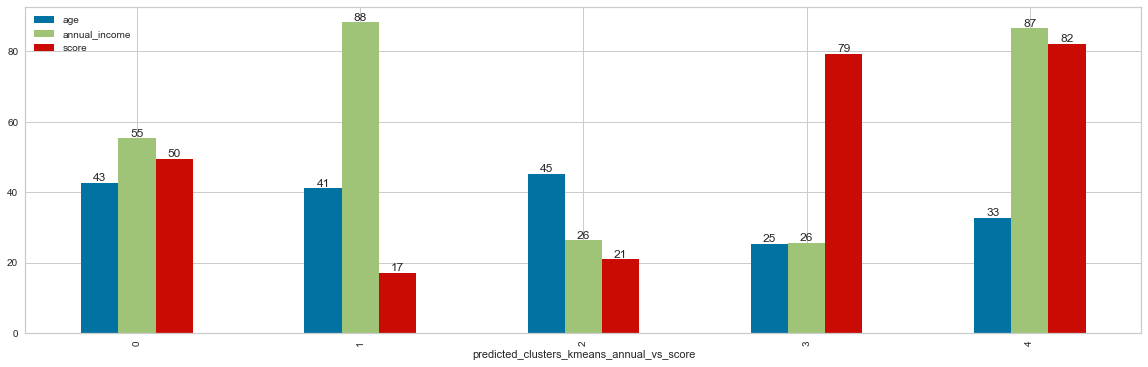

In [218]:
ax = df.iloc[:, [1,2,3,4,6]].groupby('predicted_clusters_kmeans_annual_vs_score').mean().plot(kind='bar', 
                                                                                        figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43. Both annual_income and spending_score are on average. 
It should be researched what can be done to direct this group of customers to spend more.

**cluster 1**: The average age is around 41. The annual income is very high but the spending score is very low for this group. This group is our target audience and special strategies need to be developed for this 
group.

**cluster 2** :The average age is around 45. Both annual_income and spending_score are very low. This group can be directed to do more shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_income but very high spending score. This group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33. Both annual_income and spending_score are very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions should be made in order not to lose this group of customers.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___